In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
ts = TimeSeries(key='2J2BP2H90CUIBWSJ',output_format='pandas')

In [3]:
IBM_data, metadata=ts.get_daily('IBM',outputsize='full')
IBM_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5225.000000,5225.000000,5225.000000,5225.000000,5.225000e+03
mean,129.150949,130.327317,128.053882,129.209325,6.121689e+06
std,37.821068,37.879554,37.769428,37.830221,3.313863e+06
min,54.650000,56.700000,54.010000,55.070000,1.928430e+05
25%,94.950000,95.910000,93.800000,94.890000,3.871000e+06
50%,124.320000,125.750000,123.010000,124.490000,5.293400e+06
75%,157.660000,159.140000,156.330000,157.890000,7.431800e+06
max,215.380000,215.900000,214.300000,215.800000,4.120730e+07


In [6]:
IBM_data.to_csv('IBM_data.csv')

In [7]:
IBM_data['date'] = IBM_data.index

In [8]:
IBM_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-06,125.00,126.26,125.00,126.12,3417131.0,2020-08-06
2020-08-05,126.73,126.75,124.61,125.45,3675400.0,2020-08-05
2020-08-04,123.82,125.86,123.82,125.84,3431366.0,2020-08-04
2020-08-03,123.50,124.41,122.15,124.31,3526574.0,2020-08-03
2020-07-31,122.71,122.99,121.09,122.94,5277652.0,2020-07-31
...,...,...,...,...,...,...
1999-11-05,92.75,92.94,90.19,90.25,13737600.0,1999-11-05
1999-11-04,94.44,94.44,90.00,91.56,16697600.0,1999-11-04
1999-11-03,95.87,95.94,93.50,94.37,10369100.0,1999-11-03


In [9]:
IBM_training_complete = pd.read_csv('/Users/kelbywilson/Desktop/project_3/IBM_data.csv')

In [10]:
IBM_training_processed = IBM_training_complete.iloc[:, 1:2].values

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

IBM_training_scaled = scaler.fit_transform(IBM_training_processed)

In [12]:
features_set = []
labels = []
for i in range(60, 5225):
    features_set.append(IBM_training_scaled[i-60:i, 0])
    labels.append(IBM_training_scaled[i, 0])

In [13]:
# Convert both the feature_set and the labels list to the numpy array before we can use it for training
features_set, labels = np.array(features_set), np.array(labels)

In [14]:
# In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM.
# We need to convert our data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [17]:
model = Sequential()

In [18]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [19]:
# Add dropout layer to avoid overfitting of the data
model.add(Dropout(0.2))

In [20]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [21]:
# To make our model more robust we add a dense layer
model.add(Dense(units = 1))

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5165 samples
Epoch 1/100
5165/5165 [==============================] - 26s 5ms/sample - loss: 0.0160
Epoch 2/100
5165/5165 [==============================] - 25s 5ms/sample - loss: 0.0039
Epoch 3/100
5165/5165 [==============================] - 25s 5ms/sample - loss: 0.0035
Epoch 4/100
5165/5165 [==============================] - 25s 5ms/sample - loss: 0.0032
Epoch 5/100
5165/5165 [==============================] - 26s 5ms/sample - loss: 0.0028
Epoch 6/100
5165/5165 [==============================] - 25s 5ms/sample - loss: 0.0026
Epoch 7/100
5165/5165 [==============================] - 24s 5ms/sample - loss: 0.0023
Epoch 8/100
5165/5165 [==============================] - 24s 5ms/sample - loss: 0.0021
Epoch 9/100
5165/5165 [==============================] - 23s 5ms/sample - loss: 0.0022
Epoch 10/100
5165/5165 [==============================] - 23s 5ms/sample - loss: 0.0019
Epoch 11/100


5165/5165 [==============================] - 23s 5ms/sample - loss: 5.9862e-04
Epoch 88/100
5165/5165 [==============================] - 24s 5ms/sample - loss: 6.1915e-04
Epoch 89/100
5165/5165 [==============================] - 24s 5ms/sample - loss: 5.9588e-04
Epoch 90/100
5165/5165 [==============================] - 24s 5ms/sample - loss: 6.2382e-04
Epoch 91/100
5165/5165 [==============================] - 23s 5ms/sample - loss: 6.6571e-04
Epoch 92/100
5165/5165 [==============================] - 24s 5ms/sample - loss: 6.2024e-04
Epoch 93/100
5165/5165 [==============================] - 24s 5ms/sample - loss: 6.4403e-04
Epoch 94/100
5165/5165 [==============================] - 24s 5ms/sample - loss: 6.2313e-04
Epoch 95/100
5165/5165 [==============================] - 24s 5ms/sample - loss: 6.0518e-04
Epoch 96/100
5165/5165 [==============================] - 24s 5ms/sample - loss: 6.3554e-04
Epoch 97/100
5165/5165 [==============================] - 23s 5ms/sample - loss: 6.1882e-04
E

In [27]:
# First calculate the mid prices from the highest and lowest
#high_prices = df.loc[:,'High'].to_numpy()
#low_prices = df.loc[:,'Low'].to_numpy()
#mid_prices = (high_prices+low_prices)/2.0

NameError: name 'df' is not defined

In [ ]:
#train_bound = int(2*len(mid_prices)/3)
#train_data = mid_prices[:train_bound]
#test_data = mid_prices[train_bound:]

In [34]:
IBM_testing_complete = pd.read_csv('/Users/kelbywilson/Desktop/project_3/daily_IBM_3-18-20-8-7-20.csv')
IBM_testing_processed = IBM_testing_complete.iloc[:, 1:2].values

In [37]:
IBM_total = pd.concat((IBM_training_complete['1. open'], IBM_testing_complete['open']), axis=0)

In [38]:
test_inputs = IBM_total[len(IBM_total) - len(IBM_testing_complete) - 60:].values

In [39]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [40]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [41]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [42]:
predictions = model.predict(test_features)

In [43]:
predictions = scaler.inverse_transform(predictions)

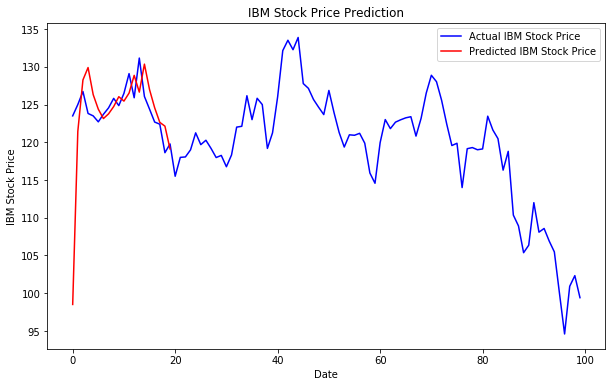

In [44]:
plt.figure(figsize=(10,6))
plt.plot(IBM_testing_processed, color='blue', label='Actual IBM Stock Price')
plt.plot(predictions , color='red', label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [ ]:
#best_prediction_epoch